In [78]:
# loading library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#size - in pixels, size of motion blur
#angel - in degrees, direction of motion blur
def motion_blur(image, size, angle):
    k = np.zeros((size, size), dtype=np.float32)
    k[ (size-1)// 2 , :] = np.ones(size, dtype=np.float32)
    rotation_matrix = cv.getRotationMatrix2D( (size / 2 -0.5 , size / 2 -0.5 ) , angle, 1.0)
    k = cv.warpAffine(k, rotation_matrix, (size, size) )
    k = k * ( 1.0 / np.sum(k) )
    return cv.filter2D(image, -1, k)

def random_motion_blur(image, size=(0, 5)):
    deg = 360 * np.random.random_sample() # random angle from 0 to 360
    rad = np.random.randint(*size)        # random size within given interval
    return motion_blur(image, rad, deg)

def gaussian_blur(image, size=5):
    return cv.GaussianBlur(image, (size, size), 0)


In [79]:
def increase_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv.merge((h, s, v))
    image = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    return image

def decrease_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    v[v <= value] = 0
    v[v >  value] -= value

    final_hsv = cv.merge((h, s, v))
    image = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    return image

def adjust_brightness(image, value):
    return decrease_brightness(image, -1*value) if value < 0 else increase_brightness(image, value)

In [83]:
def create_effect(fn, *args, **kwargs):
    return lambda img : fn(img, *args, **kwargs)

def apply_effects(img, fxs):
    for fx in fxs:
        img = fx(img)
    return img

In [91]:
import os

def generate_image_with_effects(in_dir, out_dir, fxs):
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
        
    for file in os.listdir(in_dir):
        in_path = os.path.join(in_dir, file)
        out_path = os.path.join(out_dir, file)
        
        img = cv.imread(in_path)
        img = apply_effects(img, fxs)
        
        cv.imwrite(out_path, img)
        

# img = cv.imread('./images/Positive/00001.jpg')

# dec = create_effect(decrease_brightness, 14)
# gau = create_effect(gaussian_blur,       17)

# img = apply_effects(img, [dec, gau])

# plt.imshow(random_motion_blur(img, (5, 50)))

In [92]:
random_motion_blur_effect = create_effect(random_motion_blur, size=(5, 30))
generate_image_with_effects("./images/Positive", "./test/Positive", [random_motion_blur_effect])

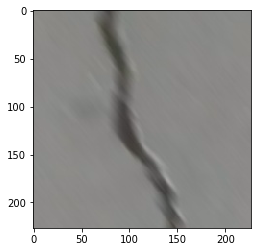

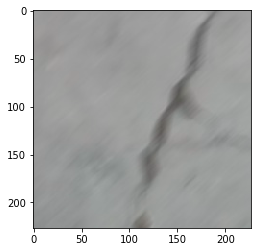

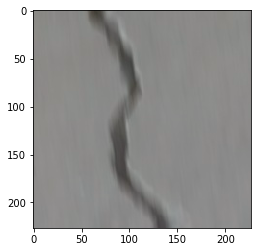

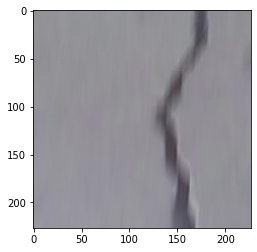

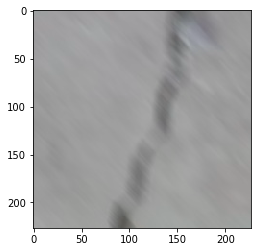

In [102]:
plt.imshow(cv.imread("./test/Positive/00001.jpg")); plt.show()
plt.imshow(cv.imread("./test/Positive/00002.jpg")); plt.show()
plt.imshow(cv.imread("./test/Positive/00003.jpg")); plt.show()
plt.imshow(cv.imread("./test/Positive/00004.jpg")); plt.show()
plt.imshow(cv.imread("./test/Positive/00005.jpg")); plt.show()